In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
time = np.linspace(0, 1, 512)
# print(time)
def sinwave(amp, freq, time, phase=0):
  return amp * np.sin(freq*2*np.pi*time + phase)

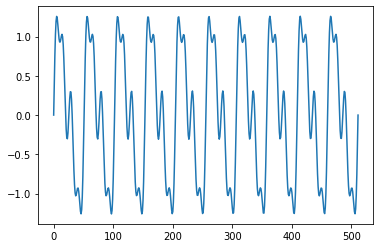

(512,) float16


In [23]:
w31 = sinwave(1, 10, time)
w32 = sinwave(0.5, 20, time)
w33 = sinwave(1/3, 40, time)
sample = w31+w32+w33
sample = sample.astype(np.float16)
plt.plot(sample)    
plt.show()
print(sample.shape, sample.dtype)

In [24]:
filename = "bin/input.bin"
with open(filename, 'wb') as f:
    sample.astype(np.float32).tofile(f)

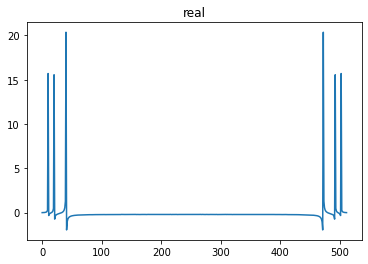

In [29]:
with open("bin/export/output.bin", "rb") as f:
    rectype = np.dtype(np.float32)
    res = np.fromfile(f, dtype=rectype)
plt.title("real")
plt.plot(res[:512])

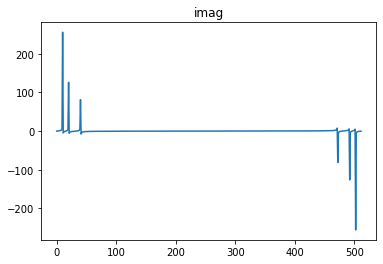

In [30]:
plt.title("imag")
plt.plot(res[512:])

(0.0, 50.0)

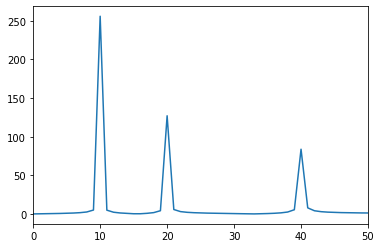

In [31]:
plt.plot(np.sqrt(res[:512]**2 + res[512:]**2))
plt.xlim(0, 50)

(0.0, 50.0)

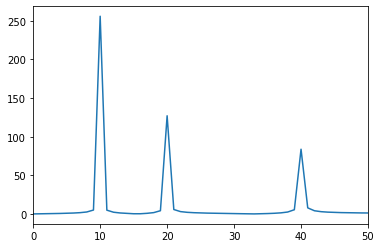

In [28]:
nft = np.fft.fft(sample)
plt.plot(abs(nft))
plt.xlim(0,50)